**PROJECT CONTEXT**: In this project we aim to predict the weekly sales of Walmart using predictive analytics techniques. The dataset contains information on various factors that could potentially influence weekly sales such as store,holidays, temperature, fuel price, consumer price index and unemployment rate.

**PROJECT OBJECTIVE:**The primary objective of the project is to develop predictive models that accurately forecast the weekly sales of Walmart based on available features. We will be using several techniques including K-Nearest Neighbor, Decision Tree, Linear Regression and Random Forest to achieve this objective. Our analysis also includes exploring the relationships between these features and weekly sales and also understanding the correlations among features. Additionally, the performance of these models are evaluated and the most effective one is selected for prediction of weekly sales.

**DATASET:** The dataset consists of 720 rows and 7 columns consisting of data collected in the year 2012. The columns included have the following features.

*   **Store**: Represents the identifier of each of the walmart stores in the dataset.
*   **Holiday_Flag**: A variable indicating whether a holiday occured during the week i.e 1 for holiday and 0 for not holiday. The day can affect the number of visit to the store which can have further have an effect on weekly sales.
*   **Temperature**: A numerical variable representing the average temperature during the week. The measure is collected in Farenheit. Weather conditions can influence consumer behaviour and also the visits to the store.
*   **Fuel_Price**: A numerical variable representing the average fuel price during the week. Fluctuations in this can affect transporation costs.
*   **Consumer Price Index**: A numerical variable which represents the Consumer Price Index of the week. CPI measure the change in price level of a market ofconsumer goods and services over time reflecting inflation pressures.
*   **Unemployment**: A numerical variable indicating the unemployment rate for the week. High unemployment may cause discretionary spending.
*   **Weekly_Sales**: The target variable or outcome which represents the total sales of the week. This variable is predicted using the features.










In [ ]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pylab as plt
from sklearn import preprocessing
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score , BIC_score
from dmba import liftChart, gainsChart

Colab environment detected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**READING THE DATASET**

In [ ]:
walmart_df = pd.read_excel ('/content/drive/MyDrive/BUSI 650/Data/walmart 2012 .xlsx')

**DROPPING COLUMNS**

In [ ]:
walmart_df = walmart_df.drop(columns=['Date'])

In [ ]:
walmart_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.550e+06,0,49.01,3.157,219.714,7.348
1,1,1.636e+06,0,56.55,3.360,220.172,7.348
2,1,1.802e+06,1,48.02,3.409,220.265,7.348
3,1,1.688e+06,0,60.96,3.630,220.848,7.348
4,1,1.675e+06,0,58.76,3.669,221.059,7.348
...,...,...,...,...,...,...,...
715,45,7.257e+05,0,76.58,3.654,191.164,8.684
716,45,7.330e+05,0,78.65,3.722,191.163,8.684
717,45,7.665e+05,1,75.70,3.911,191.578,8.684
718,45,7.335e+05,0,64.89,3.985,192.170,8.667


**VIEWING THE FIRST AND LAST 5 ROWS OF THE DATASET**

In [ ]:
walmart_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1550369.92,0,49.01,3.157,219.714258,7.348
1,1,1636339.65,0,56.55,3.360,220.172015,7.348
2,1,1802477.43,1,48.02,3.409,220.265178,7.348
3,1,1688420.76,0,60.96,3.630,220.848045,7.348
4,1,1675431.16,0,58.76,3.669,221.059189,7.348


In [ ]:
walmart_df.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
715,45,725729.51,0,76.58,3.654,191.164090,8.684
716,45,733037.32,0,78.65,3.722,191.162613,8.684
717,45,766512.66,1,75.70,3.911,191.577676,8.684
718,45,733455.07,0,64.89,3.985,192.170412,8.667
719,45,734464.36,0,54.47,4.000,192.327265,8.667


**UNDERSTANDING THE SHAPE OF THE DATASET**

In [ ]:
walmart_df.shape

(720, 7)

**CHECKING FOR DUPLICATES**

In [ ]:
walmart_df[walmart_df.duplicated()].count()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64



*   It is observed that there are no duplicate values.




**CHECKING THE DATA TYPES OF THE COLUMNS FOR THE DATASET**

In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         720 non-null    int64  
 1   Weekly_Sales  720 non-null    float64
 2   Holiday_Flag  720 non-null    int64  
 3   Temperature   720 non-null    float64
 4   Fuel_Price    720 non-null    float64
 5   CPI           720 non-null    float64
 6   Unemployment  720 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 39.5 KB




*   It is observed that all the data types are either int or float




**CHECKING FOR MISSING VALUES**

In [ ]:
walmart_df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64



*   There are no missing values in the data.



**SUMMARY OF THE DATASET**

In [ ]:
walmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,720.0,2.300000e+01,12.996201,1.000000,12.000000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,720.0,1.068118e+06,556771.299165,248051.530000,579082.977500,985156.495000,1.464974e+06,2.565260e+06
Holiday_Flag,720.0,1.250000e-01,0.330949,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
Temperature,720.0,6.216251e+01,17.751729,18.670000,49.902500,62.675000,7.702000e+01,1.000700e+02
Fuel_Price,720.0,3.695344e+00,0.279697,3.031000,3.501000,3.693000,3.882000e+00,4.468000e+00
CPI,720.0,1.754447e+02,40.675158,130.157516,136.698129,190.253745,2.204357e+02,2.271694e+02
Unemployment,720.0,7.343506e+00,1.700426,3.879000,6.219750,7.145000,8.253000e+00,1.218700e+01




*   The data does not have any skewness. All the variables seem to be almost symmetrical.




**CALCULATING AND VISUALIZING THE CORRELATION BETWEEN VARIABLES**

In [ ]:
walmart_df.corr().round(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.00,-0.35,-0.00,-0.03,0.12,-0.21,0.24
Weekly_Sales,-0.35,1.00,0.02,-0.02,0.04,-0.07,-0.10
Holiday_Flag,-0.00,0.02,1.00,-0.07,-0.03,-0.00,0.01
Temperature,-0.03,-0.02,-0.07,1.00,0.13,0.19,0.04
Fuel_Price,0.12,0.04,-0.03,0.13,1.00,-0.42,0.32
CPI,-0.21,-0.07,-0.00,0.19,-0.42,1.00,-0.28
Unemployment,0.24,-0.10,0.01,0.04,0.32,-0.28,1.00


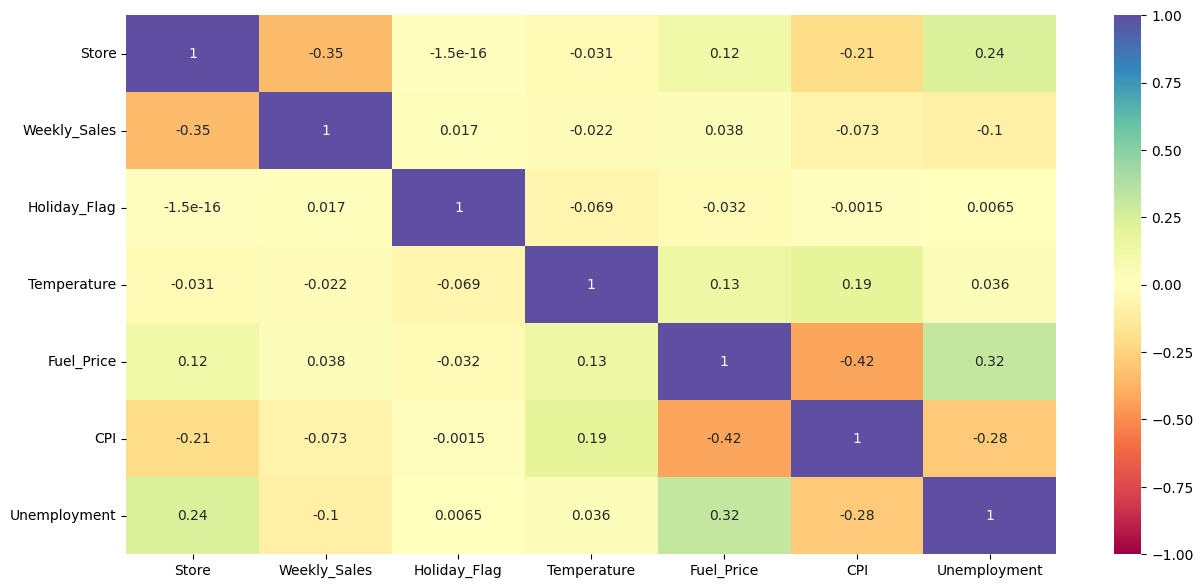

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(walmart_df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

In [ ]:
pd.set_option('display.width', 90)
pd.set_option('display.precision', 3)
correlations = walmart_df.corr(method='pearson')
print(correlations)

                  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
Store         1.000e+00        -0.345    -1.468e-16       -0.031       0.120 -0.210   
Weekly_Sales -3.455e-01         1.000     1.667e-02       -0.022       0.038 -0.073   
Holiday_Flag -1.468e-16         0.017     1.000e+00       -0.069      -0.032 -0.002   
Temperature  -3.133e-02        -0.022    -6.859e-02        1.000       0.134  0.194   
Fuel_Price    1.196e-01         0.038    -3.200e-02        0.134       1.000 -0.423   
CPI          -2.104e-01        -0.073    -1.506e-03        0.194      -0.423  1.000   
Unemployment  2.385e-01        -0.100     6.523e-03        0.036       0.318 -0.282   

              Unemployment  
Store                0.239  
Weekly_Sales        -0.100  
Holiday_Flag         0.007  
Temperature          0.036  
Fuel_Price           0.318  
CPI                 -0.282  
Unemployment         1.000  


**SCATTER PLOT**

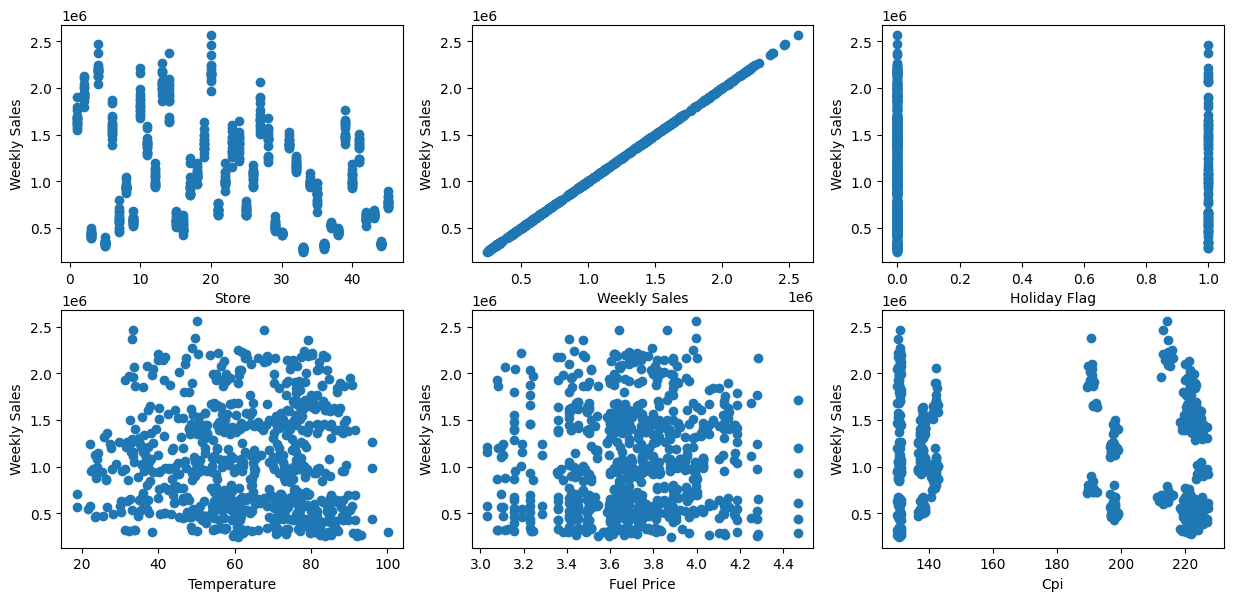

In [ ]:
plt.figure(figsize=(15,10.5))
plot_count = 1

for feature in list(walmart_df.columns)[:-1]:
        plt.subplot(3,3,plot_count)
        plt.scatter(walmart_df[feature], walmart_df['Weekly_Sales'])
        plt.xlabel(feature.replace('_',' ').title())
        plt.ylabel('Weekly Sales')
        plot_count+=1

plt.show()

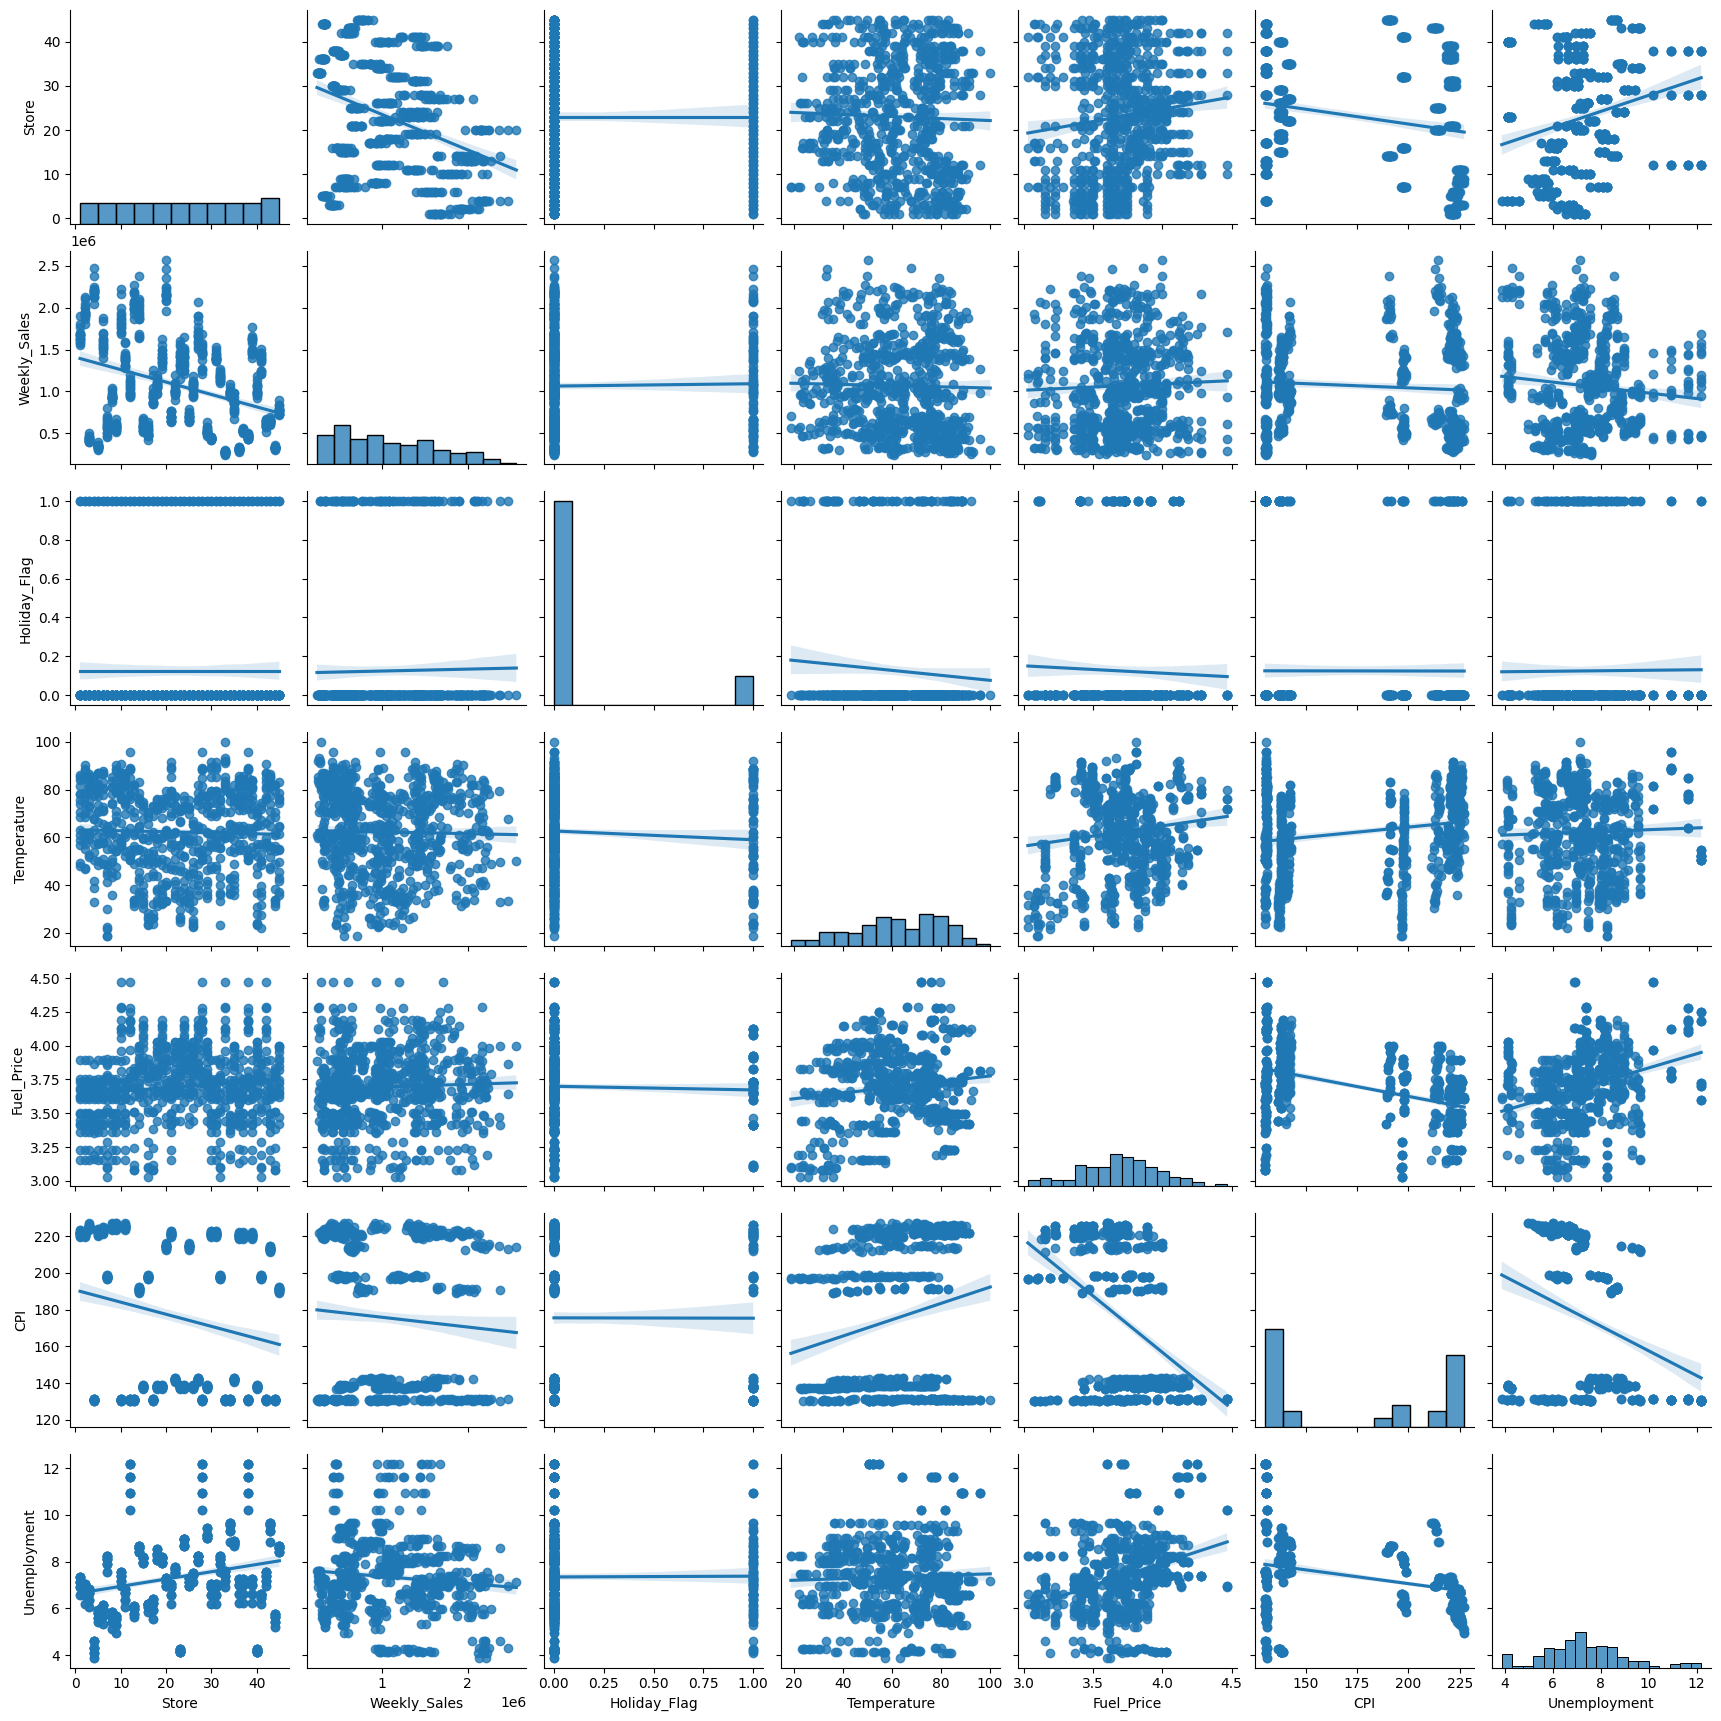

In [ ]:
walmart_df = walmart_df[(walmart_stats_df.T != 0).any()] # drops rows where all values are 0

sns.pairplot(walmart_df, vars=walmart_df.columns, kind='reg')
plt.show()

#### Outliers Detection and Removal


In [ ]:
# Walmart Dataframe before outliers removal
print(walmart_df.shape)

(720, 7)


In [ ]:
temp_df = walmart_df.copy()

for column in walmart_df.columns:
  # Removing outliers for all except categorical columns
  if column not in ['Holiday_Flag', 'Store']:
      first_quartile = temp_df[column].quantile(0.25)
      third_quartile = temp_df[column].quantile(0.75)
      inter_quartile_range = third_quartile - first_quartile

      temp_df = temp_df[temp_df[column] >= (first_quartile - 1.5 * inter_quartile_range)]
      temp_df = temp_df[temp_df[column] <= (third_quartile + 1.5 * inter_quartile_range)]

      temp_df = temp_df.reset_index(drop=True)

walmart_df = temp_df
print(walmart_df.shape)

(684, 7)


## Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on Store column

<ipython-input-22-86b6e833560a>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


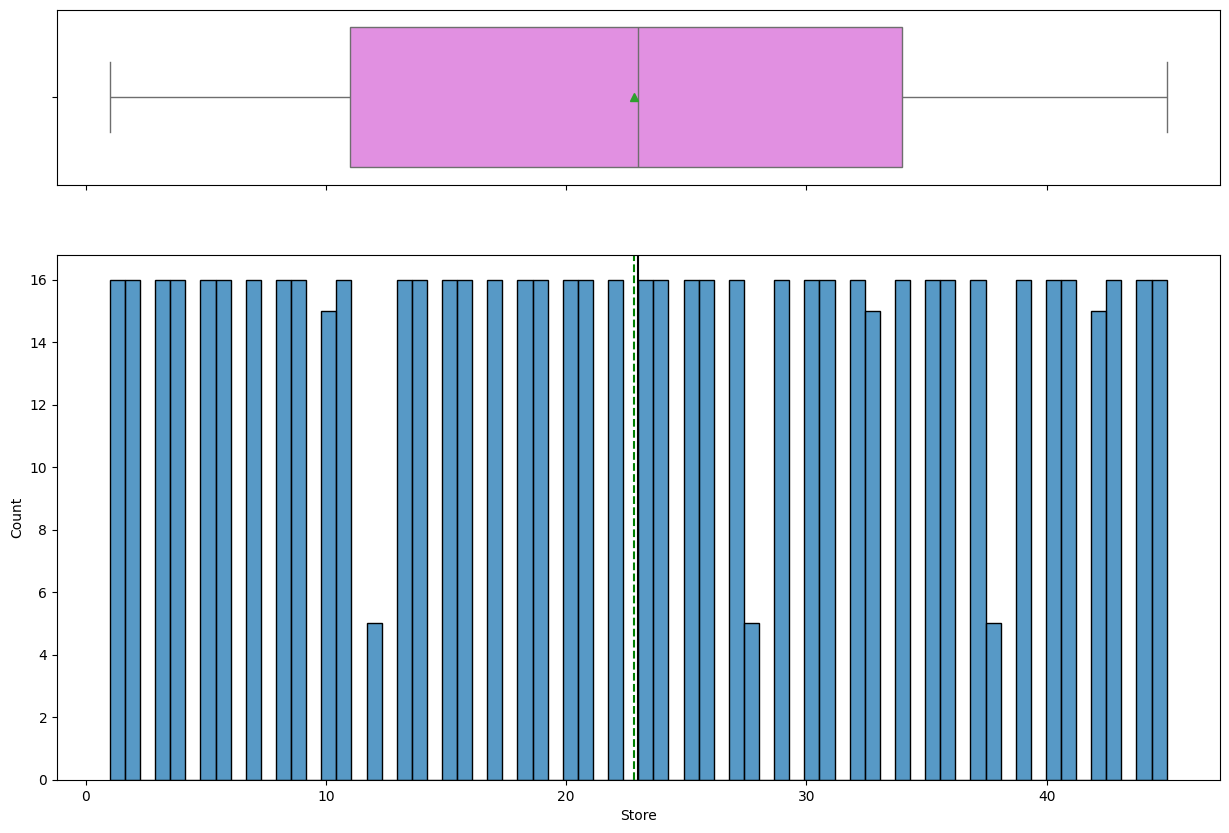

In [ ]:
histogram_boxplot(walmart_df, "Store", bins=70)

#### Observations on Holiday Flag

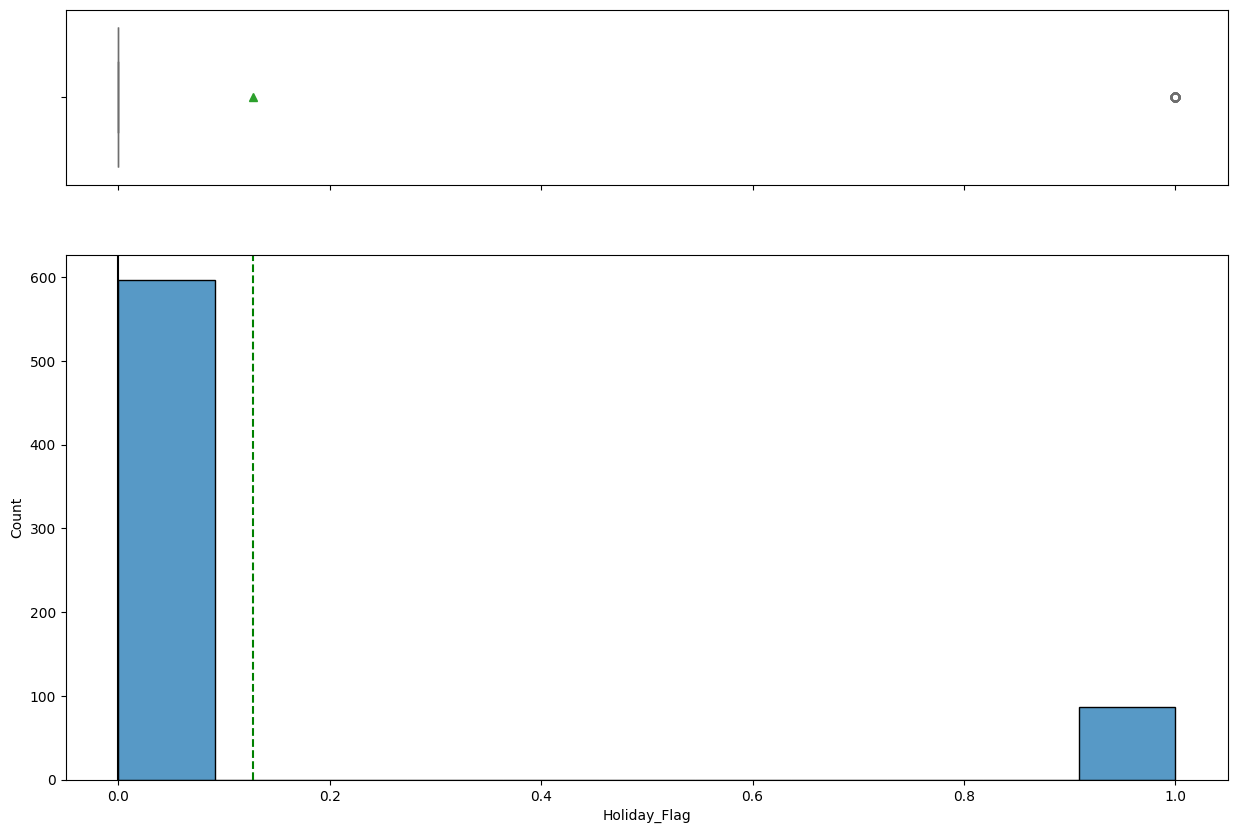

In [ ]:
histogram_boxplot(walmart_df, "Holiday_Flag")

#### Observations on Temperature

<ipython-input-22-86b6e833560a>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


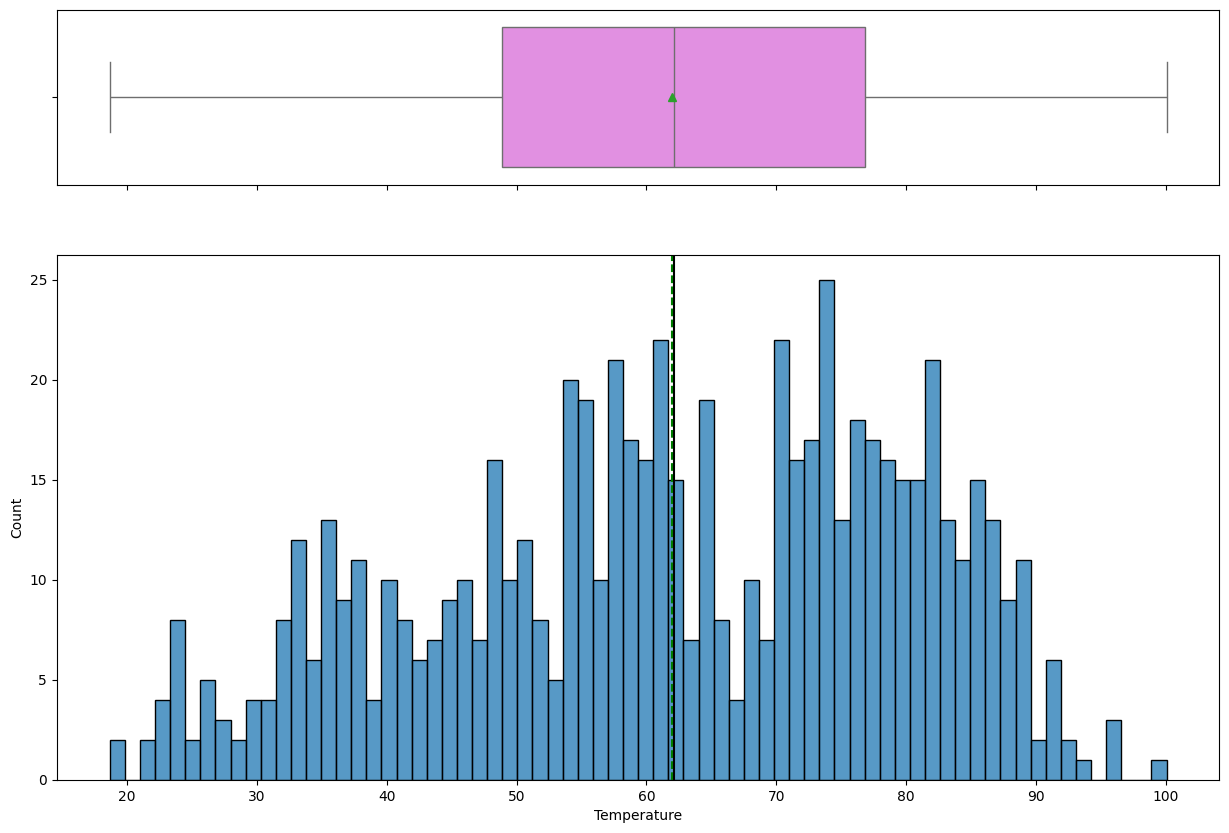

In [ ]:
histogram_boxplot(walmart_df, "Temperature", bins=70)

#### Observations on Fuel Price

<ipython-input-22-86b6e833560a>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


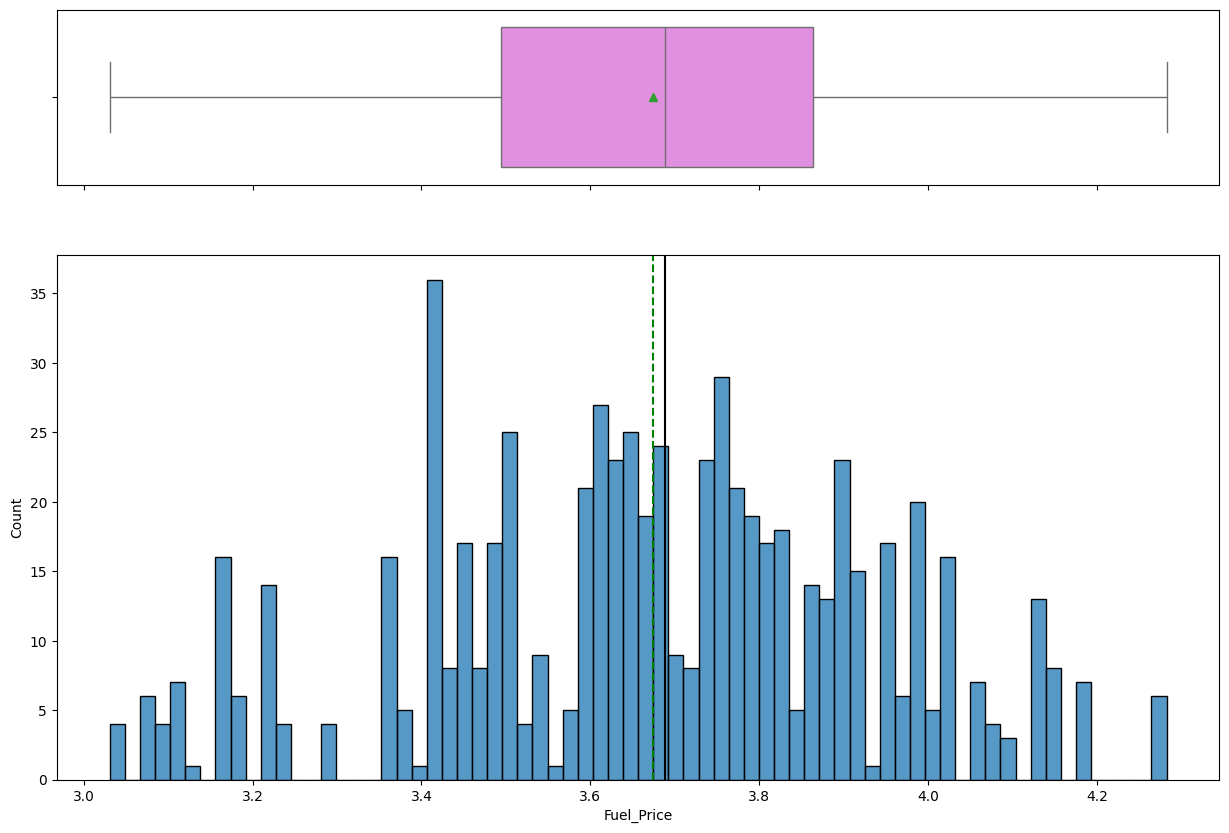

In [ ]:
histogram_boxplot(walmart_df, "Fuel_Price", bins=70)

#### Observations on CPI

<ipython-input-22-86b6e833560a>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


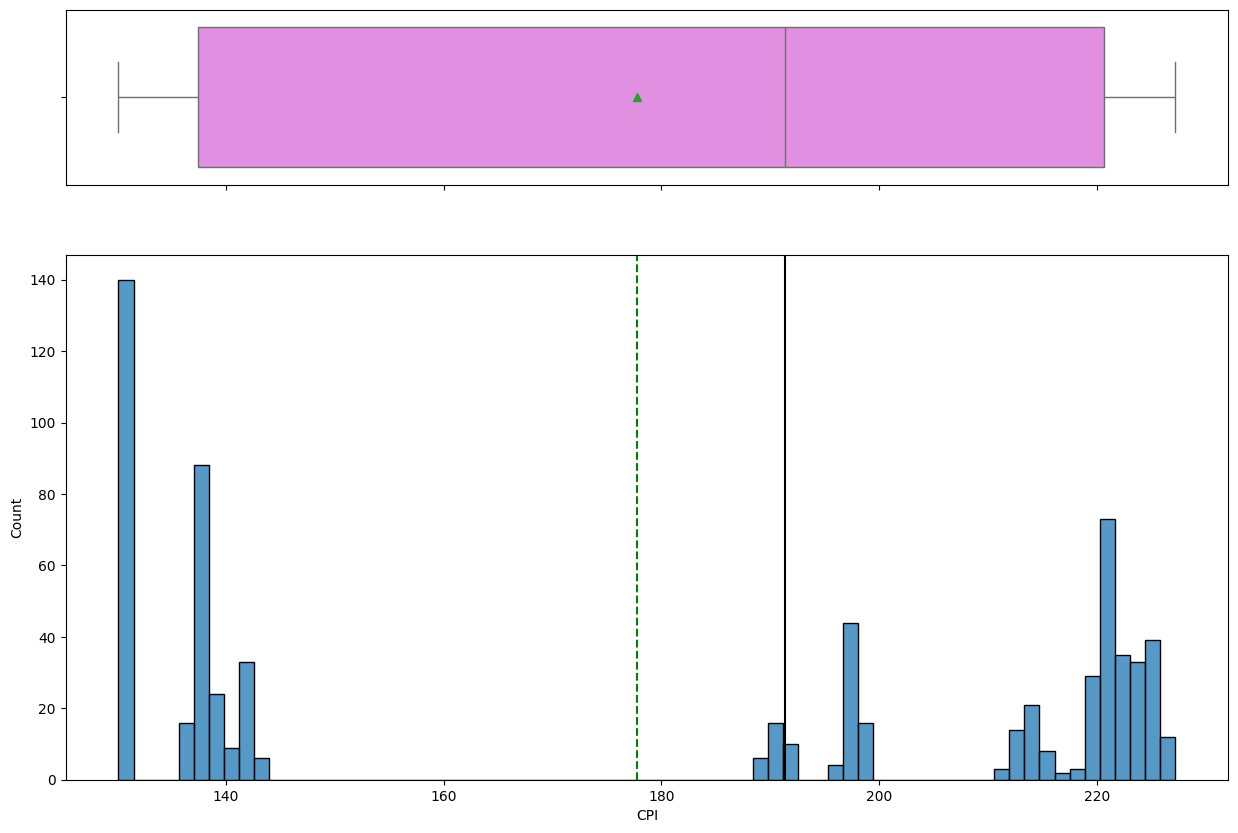

In [ ]:
histogram_boxplot(walmart_df, "CPI", bins=70)

#### Observations on Unemployment

<ipython-input-22-86b6e833560a>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


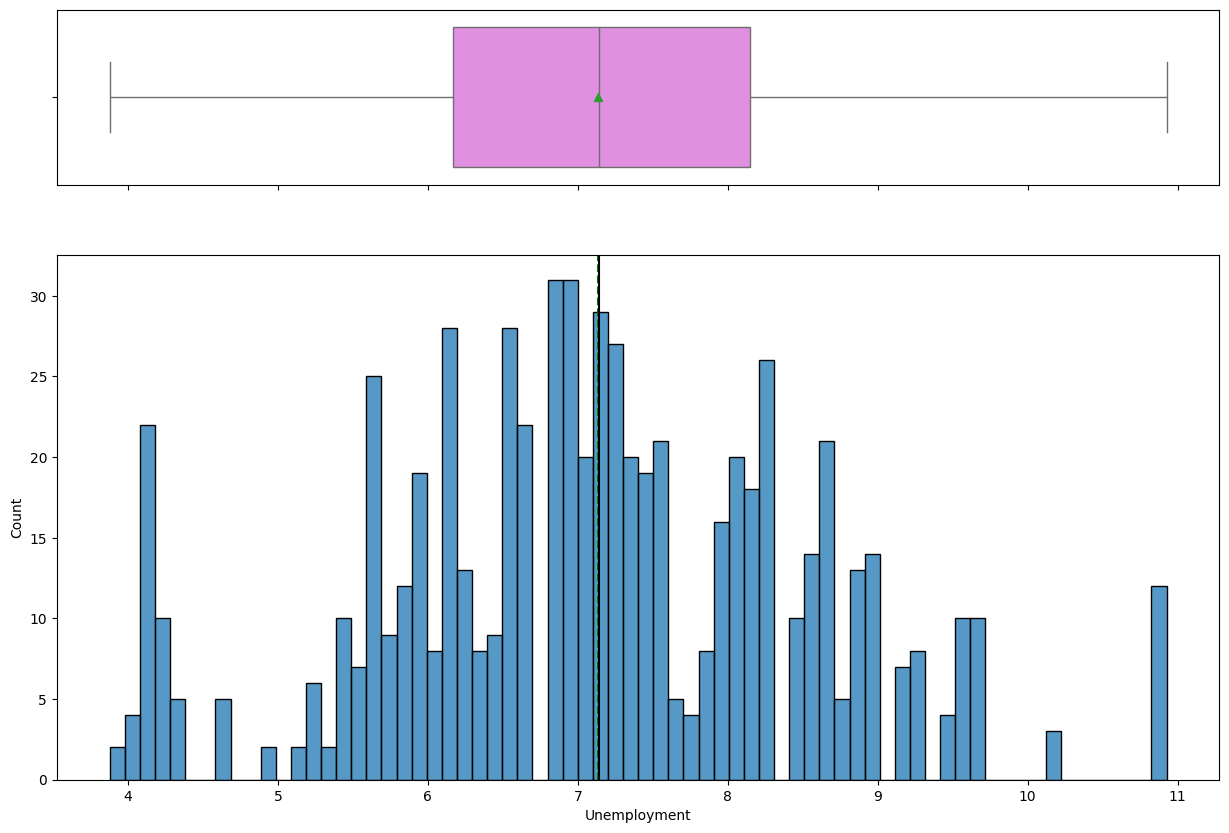

In [ ]:
histogram_boxplot(walmart_df, "Unemployment", bins=70)

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Holiday Flag

<ipython-input-29-d3f78eb572a6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


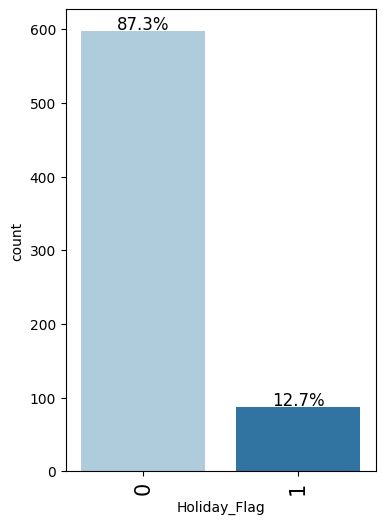

In [ ]:
labeled_barplot(walmart_df, "Holiday_Flag", perc=True)

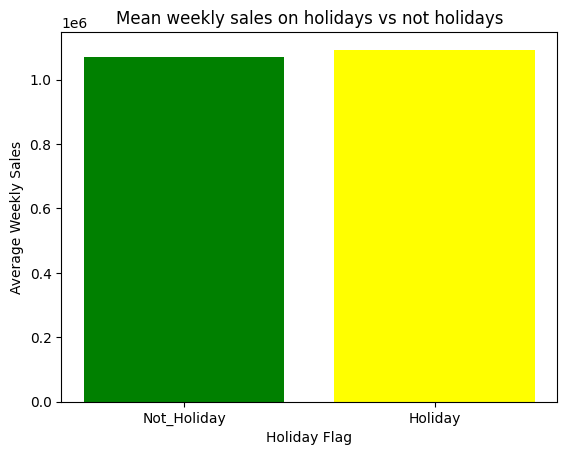

In [ ]:
holiday_sales = walmart_df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
plt.bar(['Not_Holiday', 'Holiday'], holiday_sales, color=['green', 'yellow'])
plt.title('Mean weekly sales on holidays vs not holidays')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

**IDENTIFYING THE STORE WITH MAXIMUM SALES**

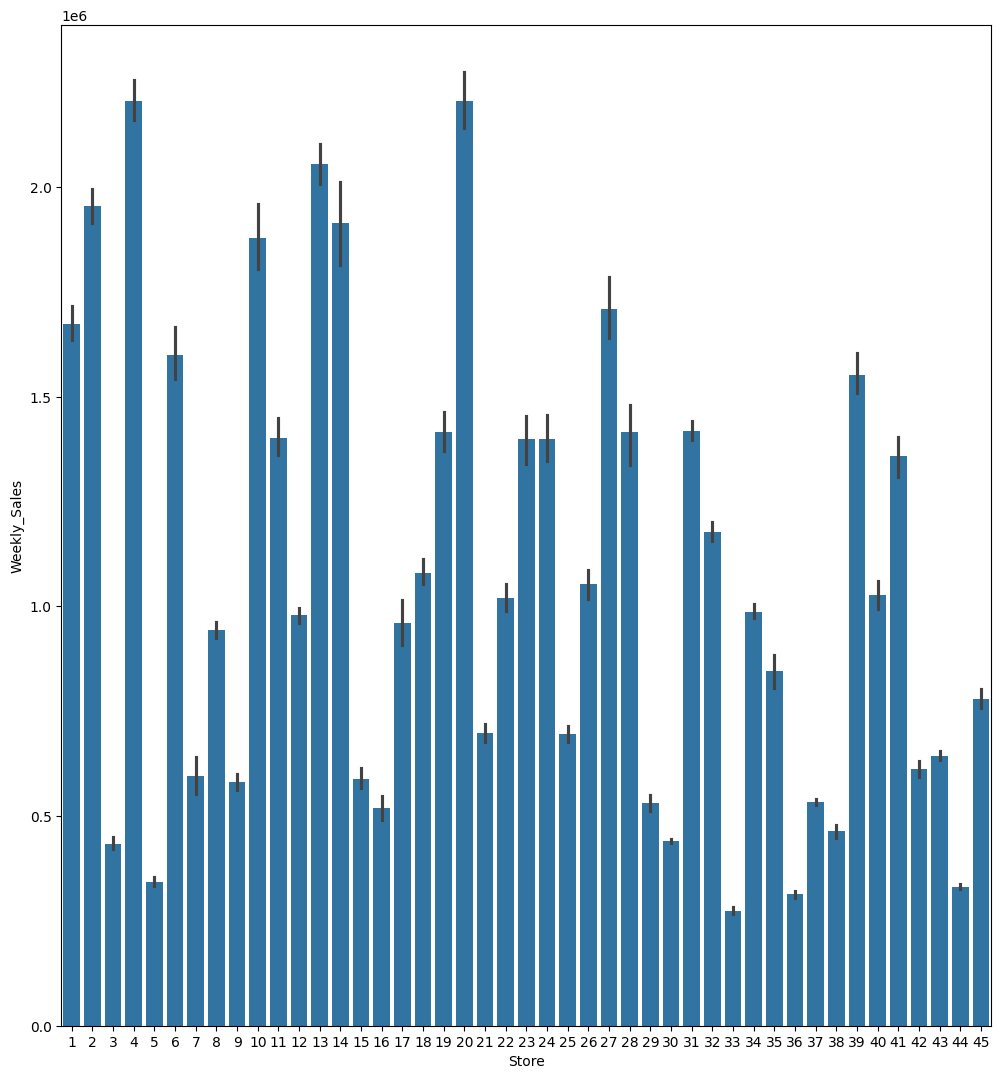

In [ ]:
plt.figure(figsize=(12,13))
sns.barplot(x='Store', y='Weekly_Sales', data=walmart_df,)
plt.show()

#### Creating dummies for category variables

In [ ]:
# Dummies only for store as it has multiple categorical values. No need to create dummies for Holiday_Flag as is only has 2 values (0 or 1)
walmart_df = pd.get_dummies(walmart_df, columns=['Store', 'Holiday_Flag'],drop_first=False)

**PREDICTION USING KNN**

In [ ]:
train_df, valid_df = train_test_split(walmart_df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', valid_df.shape)

Training set: (410, 52) Validation set: (274, 52)


In [ ]:
outcome = 'Weekly_Sales'
predictors = walmart_df.columns.drop(outcome)

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(walmart_df[predictors])

StandardScaler()

In [ ]:
train_X= scaler.transform(walmart_df[predictors])
train_y = (walmart_df[outcome])
valid_X =scaler.transform(valid_df[predictors])
valid_y = (valid_df[outcome])

In [ ]:
knn =KNeighborsRegressor(n_neighbors=1)
knn.fit(train_X,train_y)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

results = []

for k in range(1, 15):
    knn = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    predictions = knn.predict(valid_X)

    # print(valid_y)
    # print(predictions)

    mse = mean_squared_error(valid_y, predictions)
    rmse = np.sqrt(mse)

    accuracy = knn.score(valid_X, valid_y)

    results.append({
        'k': k,
        'rmse': rmse,
        'accuracy': accuracy
    })

# Convert results to a pandas data frame
results_df = pd.DataFrame(results)
print(results_df)

     k       rmse  accuracy
0    1      0.000     1.000
1    2  54866.397     0.990
2    3  64293.692     0.987
3    4  66515.015     0.986
4    5  69460.522     0.985
5    6  74338.960     0.982
6    7  77563.061     0.981
7    8  81077.239     0.979
8    9  82124.469     0.978
9   10  83505.221     0.978
10  11  85047.129     0.977
11  12  87670.253     0.975
12  13  89098.700     0.975
13  14  90337.277     0.974


k=8 is best as it has the highest accuracy score and would prevent overfitting as well

**PREDICTION USING DECISION TREE**

In [ ]:
Tree = DecisionTreeRegressor(max_depth=30, min_samples_leaf= 8)
Tree.fit(train_df[predictors], train_df[outcome])

DecisionTreeRegressor(max_depth=30, min_samples_leaf=8)

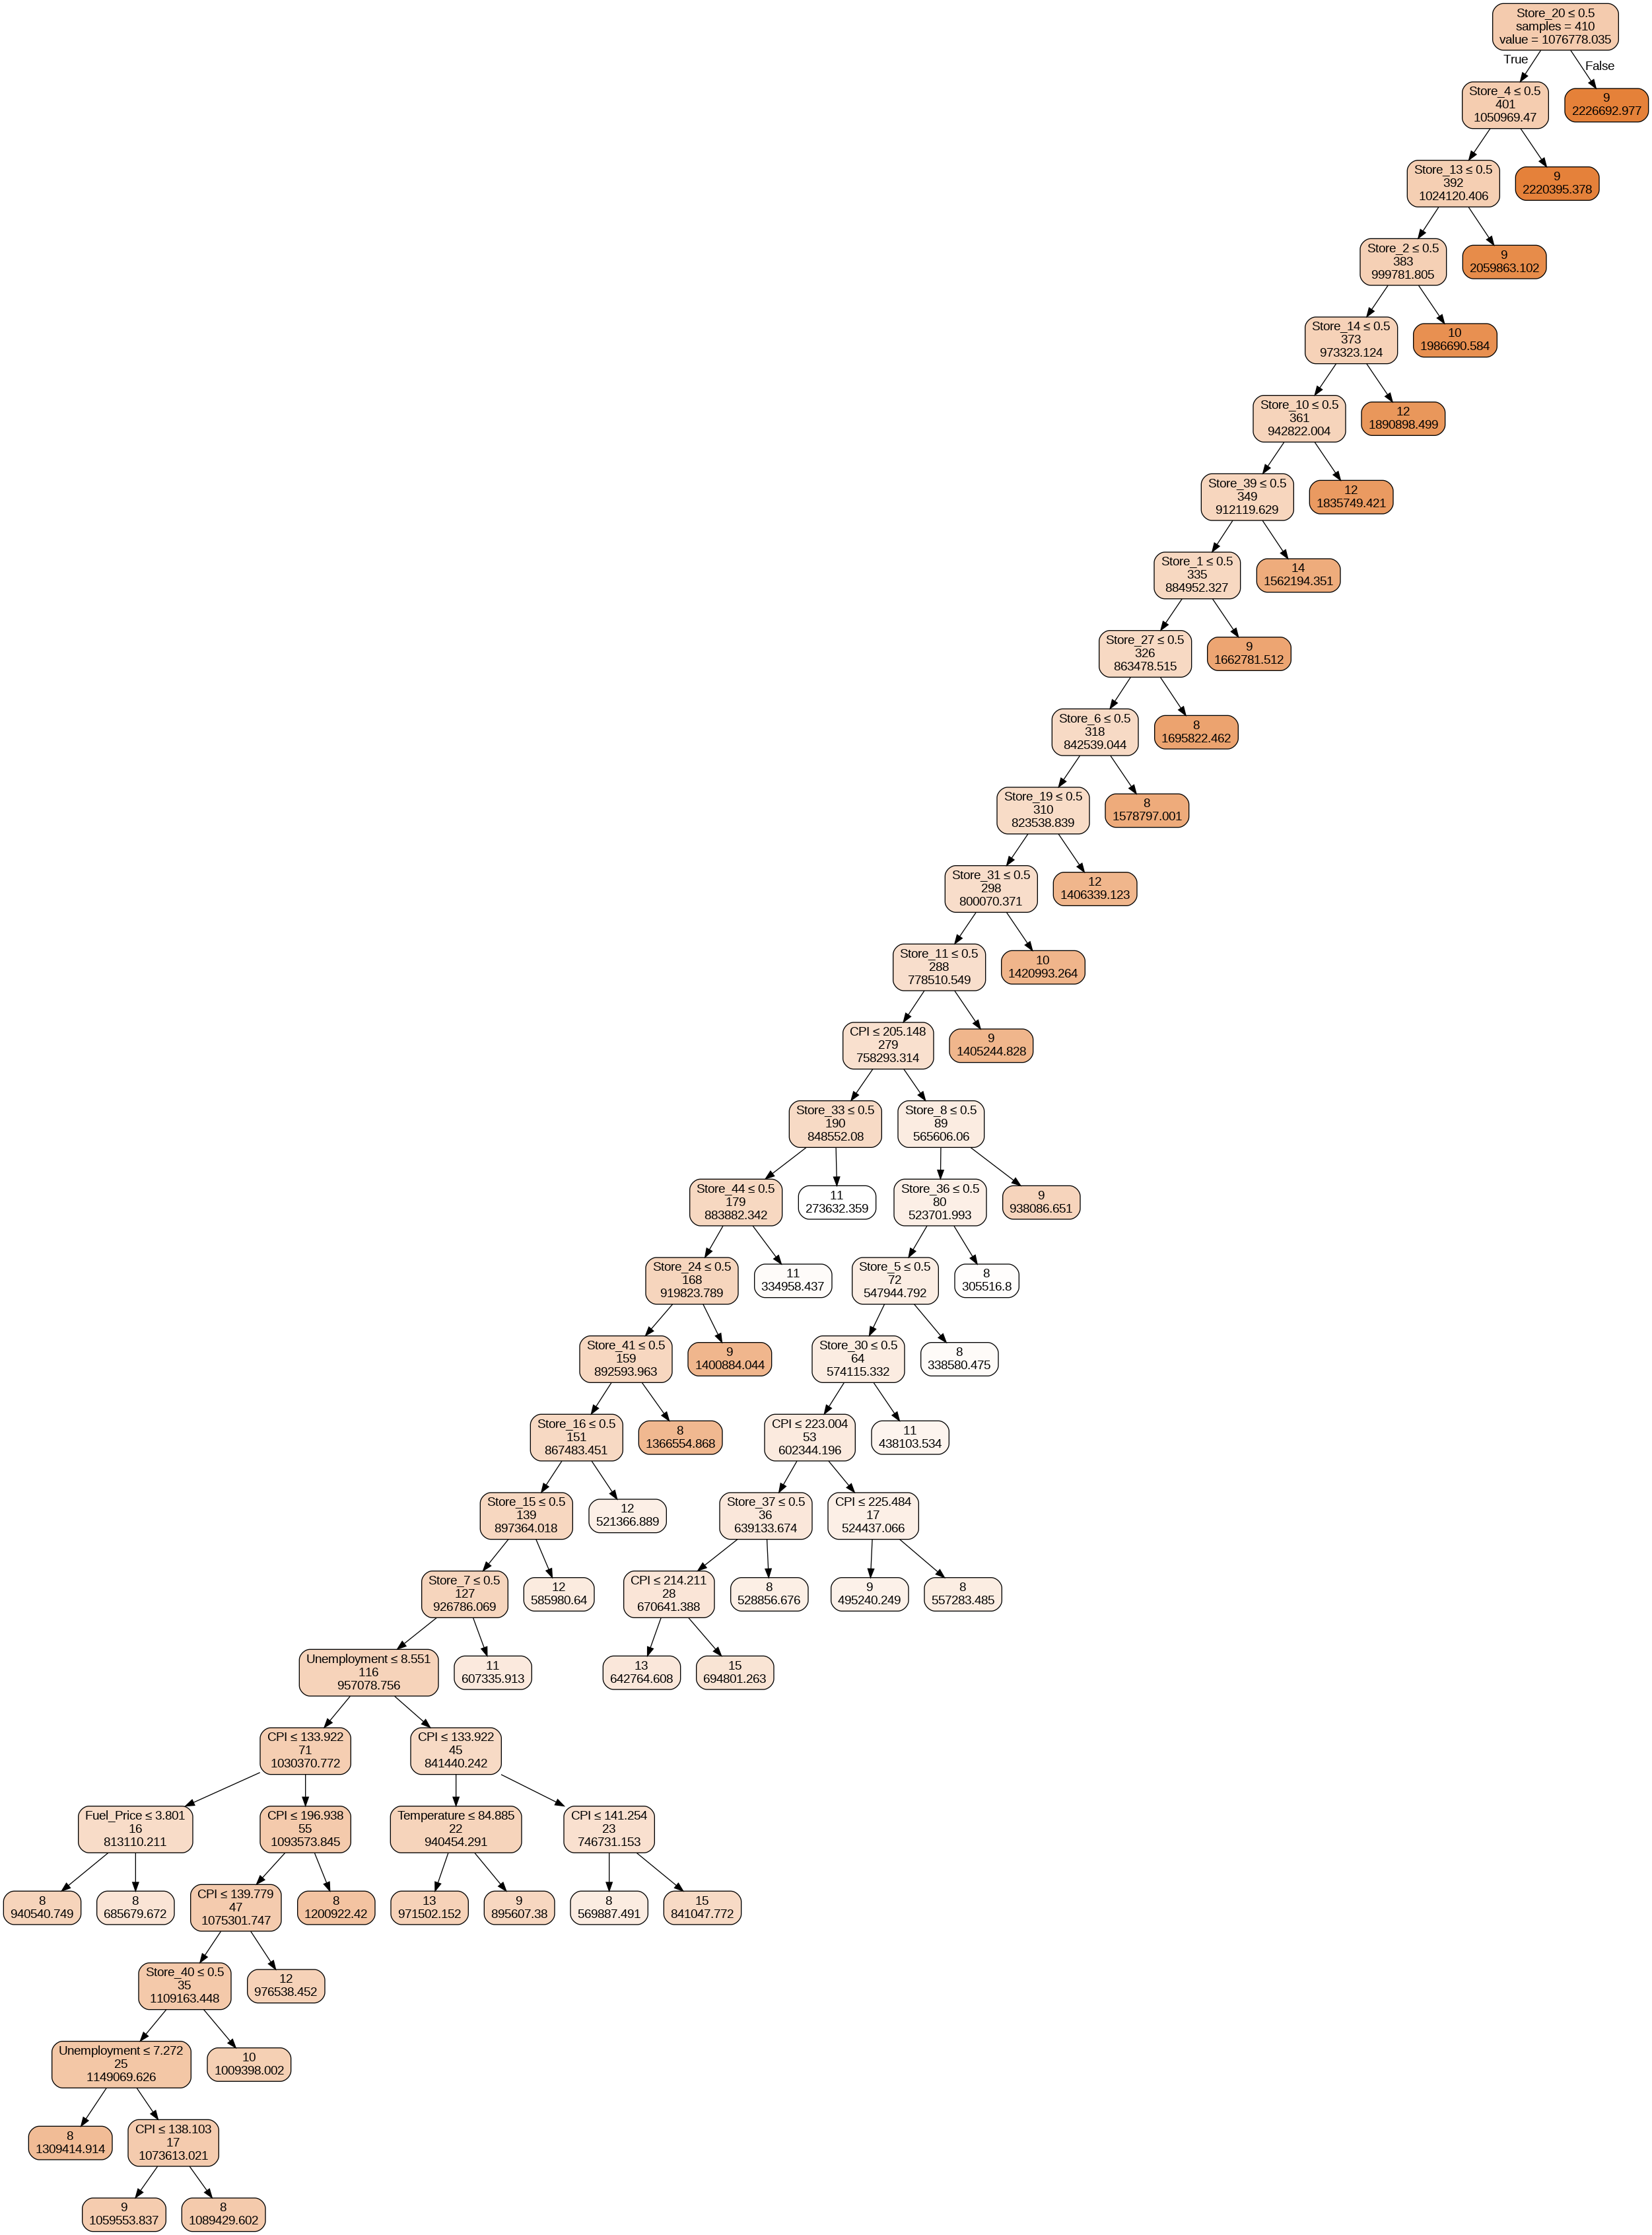

In [ ]:
plotDecisionTree(Tree, feature_names=train_df[predictors].columns)

In [ ]:

from sklearn.metrics import mean_squared_error

predictions = Tree.predict(valid_df[predictors])

mse = mean_squared_error(valid_df[outcome], predictions)
rmse = np.sqrt(mse)

accuracy = Tree.score(valid_df[predictors], valid_df[outcome])

print(rmse)
print(accuracy)

118635.90899117939
0.9548216915958384


**LIFT CHART AND CUMULATIVE GAINS CHART**

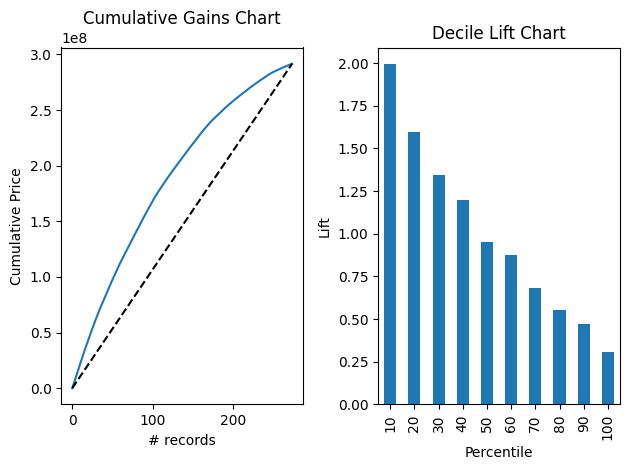

In [ ]:
pred_v = pd.Series(Tree.predict(valid_df[predictors]))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()


**PREDICTION USING NEURAL NETWORK**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

import matplotlib.pylab as plt

from dmba import regressionSummary

In [ ]:
X_df = walmart_df[predictors]
Y_df = walmart_df[[outcome]]

scaleInput = MinMaxScaler()
scaleOutput = MinMaxScaler()
X = scaleInput.fit_transform(X_df)
y = scaleOutput.fit_transform(Y_df)

In [ ]:
# train_df, valid_df = train_test_split(walmart_df, test_size=0.4, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=12345)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((410, 51), (274, 51), (410, 1), (274, 1))

In [ ]:
# train neural network with 2 hidden nodes
#Multi-layer Perceptron regressor
walmart_nnet = MLPRegressor(hidden_layer_sizes=(10, 6), activation='logistic', solver='lbfgs', random_state=1)
walmart_nnet.fit(X_train, y_train.ravel())

MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 6), random_state=1,
             solver='lbfgs')

In [ ]:
# RMSE for training set
print('Training data (2)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([walmart_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (2)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([walmart_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

from sklearn.metrics import mean_squared_error, r2_score

r_squared = r2_score(y_actual, y_pred)
print("R-squared:", r_squared)

# plot predicted vs actual values
# ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
# plt.plot([5000, 30000], [5000, 30000], color='C1')
# plt.show()

Training data (2)

Regression statistics

                      Mean Error (ME) : -111.0274
       Root Mean Squared Error (RMSE) : 80826.9760
            Mean Absolute Error (MAE) : 54576.8546
          Mean Percentage Error (MPE) : -0.1194
Mean Absolute Percentage Error (MAPE) : 5.3943

Validation data (2)

Regression statistics

                      Mean Error (ME) : -6691.0768
       Root Mean Squared Error (RMSE) : 89731.9018
            Mean Absolute Error (MAE) : 63685.5479
          Mean Percentage Error (MPE) : -1.8928
Mean Absolute Percentage Error (MAPE) : 6.5675
R-squared: 0.9762102048207406


**PREDICTION USING LINEAR REGRESSION**


In [ ]:
walmart_df = walmart_df.iloc[0:1000]

# partition data
X = pd.get_dummies(walmart_df[predictors], drop_first=True)
y = walmart_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

walmart_lm = LinearRegression()
walmart_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', walmart_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': walmart_lm.coef_}))

# print performance measures
regressionSummary(train_y, walmart_lm.predict(train_X))

intercept  -4910839359890118.0
         Predictor  coefficient
0      Temperature    1.334e+03
1       Fuel_Price    3.712e+04
2              CPI   -5.579e+03
3     Unemployment    3.935e+04
4          Store_1    1.107e+15
5          Store_2    1.107e+15
6          Store_3    1.107e+15
7          Store_4    1.107e+15
8          Store_5    1.107e+15
9          Store_6    1.107e+15
10         Store_7    1.107e+15
11         Store_8    1.107e+15
12         Store_9    1.107e+15
13        Store_10    1.107e+15
14        Store_11    1.107e+15
15        Store_12    1.107e+15
16        Store_13    1.107e+15
17        Store_14    1.107e+15
18        Store_15    1.107e+15
19        Store_16    1.107e+15
20        Store_17    1.107e+15
21        Store_18    1.107e+15
22        Store_19    1.107e+15
23        Store_20    1.107e+15
24        Store_21    1.107e+15
25        Store_22    1.107e+15
26        Store_23    1.107e+15
27        Store_24    1.107e+15
28        Store_25    1.107e+15
29       

In [ ]:
pred_y = walmart_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, walmart_lm))
print('AIC : ', AIC_score(train_y, pred_y, walmart_lm))
print('BIC : ', BIC_score(train_y, pred_y, walmart_lm))

adjusted r2 :  0.9801974767228445
AIC :  10465.881855828891
BIC :  10678.738185292905


In [ ]:
# Use predict() to make predictions on a new set
walmart_lm_pred = walmart_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': walmart_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - walmart_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, walmart_lm_pred)

     Predicted     Actual   Residual
430  5.042e+05  6.338e+05  129583.55
23   1.994e+06  1.918e+06  -76016.01
189  2.075e+06  2.182e+06  107498.90
47   4.048e+05  4.108e+05    5966.39
362  1.405e+06  1.307e+06  -98530.29
591  1.009e+06  9.998e+05   -9376.52
558  5.458e+05  5.353e+05  -10513.36
646  6.306e+05  6.456e+05   15006.59
647  6.405e+05  6.144e+05  -26131.06
500  2.671e+05  2.585e+05   -8529.88
631  6.005e+05  6.187e+05   18170.09
467  1.412e+06  1.458e+06   45781.42
594  9.922e+05  1.132e+06  139895.23
41   4.486e+05  4.463e+05   -2217.20
392  1.042e+06  1.029e+06  -13482.99
304  2.254e+06  2.144e+06 -109639.61
678  7.948e+05  8.434e+05   48575.10
427  5.125e+05  5.458e+05   33377.05
661  3.507e+05  3.402e+05  -10421.62
81   1.563e+06  1.496e+06  -66283.22

Regression statistics

                      Mean Error (ME) : 7415.3330
       Root Mean Squared Error (RMSE) : 86887.7747
            Mean Absolute Error (MAE) : 56013.1940
          Mean Percentage Error (MPE) : 0.4757


0.021897810218978103


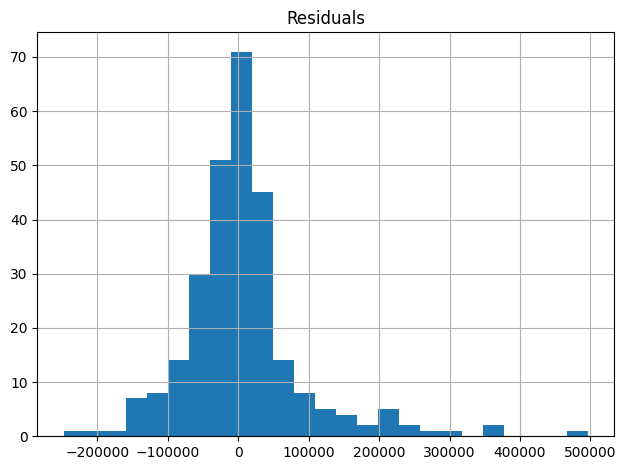

In [ ]:
walmart_lm_pred = walmart_lm.predict(valid_X)
all_residuals = valid_y - walmart_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [ ]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'Weekly_Sales ~ ' + ' + '.join(predictors)

walmart_lm = sm.ols(formula=formula, data=train_df).fit()
print(walmart_lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 02 May 2024   Prob (F-statistic):          2.43e-287
Time:                        11:35:23   Log-Likelihood:                -5179.9
No. Observations:                 410   AIC:                         1.046e+04
Df Residuals:                     360   BIC:                         1.066e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.01

**PREDICTION USING RANDOM FOREST**

In [ ]:
def handle_non_numerical_data(walmart_df):

    columns = walmart_df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if walmart_df[column].dtype != np.int64 and walmart_df[column].dtype != np.float64:

            column_contents = walmart_df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them.
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            walmart_df[column] = list(map(convert_to_int,walmart_df[column]))

    return walmart_df


In [ ]:
y_target = walmart_df[outcome]
# Y_target.reshape(len(Y_target),1)
x_train = walmart_df[predictors]

x_train = handle_non_numerical_data(x_train)
x_train.head()


<ipython-input-222-ec0619654755>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart_df[column] = list(map(convert_to_int,walmart_df[column]))


,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,...,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_0,Holiday_Flag_1
0,49.01,3.157,219.714,7.348,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,56.55,3.360,220.172,7.348,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,48.02,3.409,220.265,7.348,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.96,3.630,220.848,7.348,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,58.76,3.669,221.059,7.348,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_train.isnull().sum()

Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
Store_1           0
Store_2           0
Store_3           0
Store_4           0
Store_5           0
Store_6           0
Store_7           0
Store_8           0
Store_9           0
Store_10          0
Store_11          0
Store_12          0
Store_13          0
Store_14          0
Store_15          0
Store_16          0
Store_17          0
Store_18          0
Store_19          0
Store_20          0
Store_21          0
Store_22          0
Store_23          0
Store_24          0
Store_25          0
Store_26          0
Store_27          0
Store_28          0
Store_29          0
Store_30          0
Store_31          0
Store_32          0
Store_33          0
Store_34          0
Store_35          0
Store_36          0
Store_37          0
Store_38          0
Store_39          0
Store_40          0
Store_41          0
Store_42          0
Store_43          0
Store_44          0
Store_45          0
Holiday_Flag_0    0


In [ ]:
clf = RandomForestRegressor(n_estimators=50, random_state=1)
clf.fit(train_df[predictors], train_df[outcome])

RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
# print(clf.predict(train_df[predictors]))
print("Training Accuracy: ",clf.score(train_df[predictors], train_df[outcome]))

print("Validation Accuracy: ",clf.score(valid_df[predictors], valid_df[outcome]))

Training Accuracy:  0.9963467803979413
Validation Accuracy:  0.9741504861240466


**IDENTIFYING THE BEST MODEL**

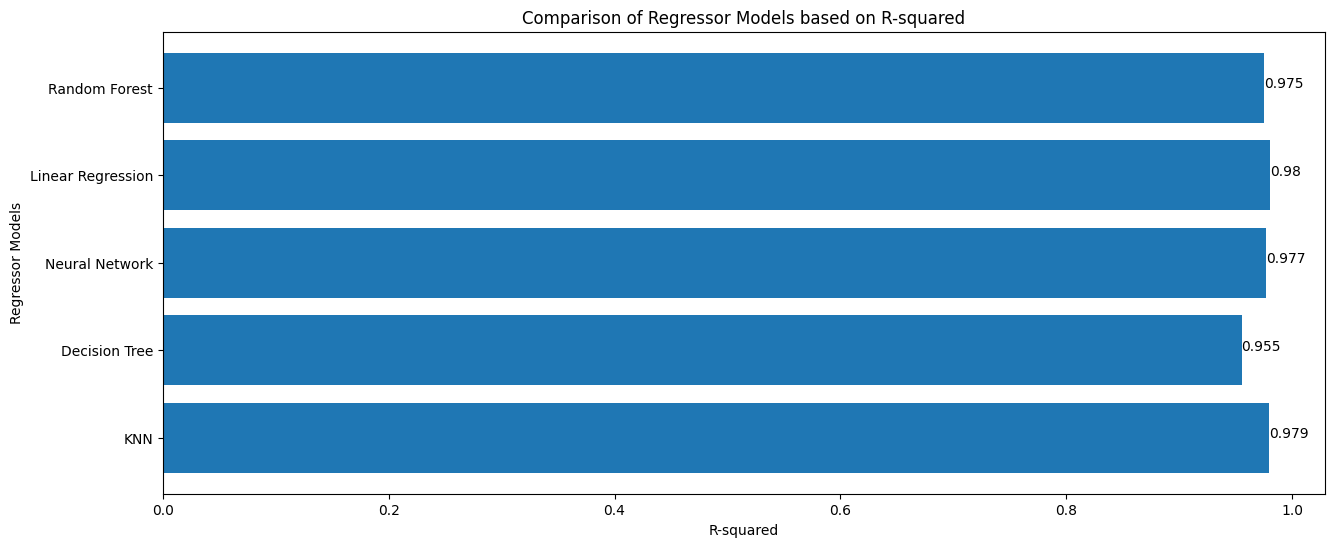

In [ ]:
import matplotlib.pyplot as plt

# # Evaluation metrics for each model
x = ['KNN', 'Decision Tree', 'Neural Network', 'Linear Regression', 'Random Forest']
y = [0.979, 0.955, 0.977, 0.980, 0.975]

# Create a bar chart for R-squared
plt.figure(figsize=(15, 6))
# plt.bar(x, y)
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

plt.xlabel('R-squared')
plt.ylabel('Regressor Models')
plt.title('Comparison of Regressor Models based on R-squared')
plt.show()




# plt.show()